   
   # PANDAS SALES ANALYSIS

<h2> Objective </h2>

Upon Initial inspection of the data, We can think of some questions about it that we would want to answer.
- What is overall sales trend ?
- What are the top 10 products by Sales?
- What are the most selling products?
- Which is the most preferred ship mode?
- Which are the profitable category and sub-category?

___

#### Importing Required Libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

In [2]:
df = pd.read_excel('superstore_sales.xlsx')
# first five rows of the dataset
df.head()

,order_id,order_date,ship_date,ship_mode,customer_name,segment,state,country,market,region,...,category,sub_category,product_name,sales,quantity,discount,profit,shipping_cost,order_priority,year
0,AG-2011-2040,2011-01-01,2011-01-06,Standard Class,Toby Braunhardt,Consumer,Constantine,Algeria,Africa,Africa,...,Office Supplies,Storage,"Tenex Lockers, Blue",408.300,2,0.0,106.140,35.46,Medium,2011
1,IN-2011-47883,2011-01-01,2011-01-08,Standard Class,Joseph Holt,Consumer,New South Wales,Australia,APAC,Oceania,...,Office Supplies,Supplies,"Acme Trimmer, High Speed",120.366,3,0.1,36.036,9.72,Medium,2011
2,HU-2011-1220,2011-01-01,2011-01-05,Second Class,Annie Thurman,Consumer,Budapest,Hungary,EMEA,EMEA,...,Office Supplies,Storage,"Tenex Box, Single Width",66.120,4,0.0,29.640,8.17,High,2011
3,IT-2011-3647632,2011-01-01,2011-01-05,Second Class,Eugene Moren,Home Office,Stockholm,Sweden,EU,North,...,Office Supplies,Paper,"Enermax Note Cards, Premium",44.865,3,0.5,-26.055,4.82,High,2011
4,IN-2011-47883,2011-01-01,2011-01-08,Standard Class,Joseph Holt,Consumer,New South Wales,Australia,APAC,Oceania,...,Furniture,Furnishings,"Eldon Light Bulb, Duo Pack",113.670,5,0.1,37.770,4.70,Medium,2011


In [3]:
# last five rows of the dataset
df.tail()

,order_id,order_date,ship_date,ship_mode,customer_name,segment,state,country,market,region,...,category,sub_category,product_name,sales,quantity,discount,profit,shipping_cost,order_priority,year
51285,CA-2014-115427,2014-12-31,2015-01-04,Standard Class,Erica Bern,Corporate,California,United States,US,West,...,Office Supplies,Binders,"Cardinal Slant-D Ring Binder, Heavy Gauge Vinyl",13.904,2,0.2,4.5188,0.890,Medium,2014
51286,MO-2014-2560,2014-12-31,2015-01-05,Standard Class,Liz Preis,Consumer,Souss-Massa-Draâ,Morocco,Africa,Africa,...,Office Supplies,Binders,"Wilson Jones Hole Reinforcements, Clear",3.990,1,0.0,0.4200,0.490,Medium,2014
51287,MX-2014-110527,2014-12-31,2015-01-02,Second Class,Charlotte Melton,Consumer,Managua,Nicaragua,LATAM,Central,...,Office Supplies,Labels,"Hon Color Coded Labels, 5000 Label Set",26.400,3,0.0,12.3600,0.350,Medium,2014
51288,MX-2014-114783,2014-12-31,2015-01-06,Standard Class,Tamara Dahlen,Consumer,Chihuahua,Mexico,LATAM,North,...,Office Supplies,Labels,"Hon Legal Exhibit Labels, Alphabetical",7.120,1,0.0,0.5600,0.199,Medium,2014
51289,CA-2014-156720,2014-12-31,2015-01-04,Standard Class,Jill Matthias,Consumer,Colorado,United States,US,West,...,Office Supplies,Fasteners,Bagged Rubber Bands,3.024,3,0.2,-0.6048,0.170,Medium,2014


In [4]:
# Shape of the dataset
df.shape

(51290, 21)

In [5]:
# Columns present in dataset
df.columns

Index(['order_id', 'order_date', 'ship_date', 'ship_mode', 'customer_name',
       'segment', 'state', 'country', 'market', 'region', 'product_id',
       'category', 'sub_category', 'product_name', 'sales', 'quantity',
       'discount', 'profit', 'shipping_cost', 'order_priority', 'year'],
      dtype='object')

In [6]:
# concise summery of the dataset
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 51290 entries, 0 to 51289
Data columns (total 21 columns):
 #   Column          Non-Null Count  Dtype         
---  ------          --------------  -----         
 0   order_id        51290 non-null  object        
 1   order_date      51290 non-null  datetime64[ns]
 2   ship_date       51290 non-null  datetime64[ns]
 3   ship_mode       51290 non-null  object        
 4   customer_name   51290 non-null  object        
 5   segment         51290 non-null  object        
 6   state           51290 non-null  object        
 7   country         51290 non-null  object        
 8   market          51290 non-null  object        
 9   region          51290 non-null  object        
 10  product_id      51290 non-null  object        
 11  category        51290 non-null  object        
 12  sub_category    51290 non-null  object        
 13  product_name    51290 non-null  object        
 14  sales           51290 non-null  float64       
 15  qu

In [7]:
# checking missing values in dataset
df.isnull().sum()

order_id          0
order_date        0
ship_date         0
ship_mode         0
customer_name     0
segment           0
state             0
country           0
market            0
region            0
product_id        0
category          0
sub_category      0
product_name      0
sales             0
quantity          0
discount          0
profit            0
shipping_cost     0
order_priority    0
year              0
dtype: int64

In [8]:
# Getting descriptive Statistics summery
df.describe()

,sales,quantity,discount,profit,shipping_cost,year
count,51290.000000,51290.000000,51290.000000,51290.000000,51290.000000,51290.000000
mean,246.490581,3.476545,0.142908,28.641740,26.375818,2012.777208
std,487.565361,2.278766,0.212280,174.424113,57.296810,1.098931
min,0.444000,1.000000,0.000000,-6599.978000,0.002000,2011.000000
25%,30.758625,2.000000,0.000000,0.000000,2.610000,2012.000000
50%,85.053000,3.000000,0.000000,9.240000,7.790000,2013.000000
75%,251.053200,5.000000,0.200000,36.810000,24.450000,2014.000000
max,22638.480000,14.000000,0.850000,8399.976000,933.570000,2014.000000


## EXPLORATORY DATA ANALYSIS

##### WHAT IS THE OVERALL SALES TREND?

In [9]:
df['order_date'].min()

Timestamp('2011-01-01 00:00:00')

In [10]:
df['order_date'].max()

Timestamp('2014-12-31 00:00:00')

In [11]:
# Getting month year from the dataset
df['month_year'] = df['order_date'].apply(lambda x: x.strftime('%y-%m'))


In [12]:
# Grouping monthly trend
df_trend = df.groupby('month_year').sum()['sales'].reset_index()

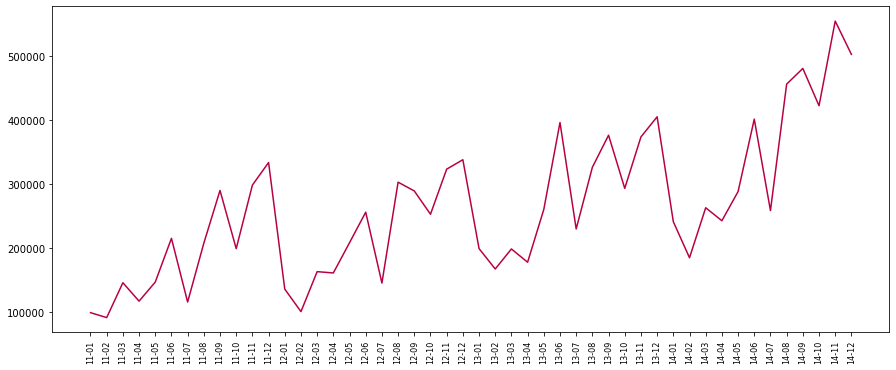

In [13]:
# Setting figure size
plt.figure(figsize = (15,6))
plt.plot(df_trend['month_year'], df_trend['sales'], color = '#b80045')
plt.xticks(rotation='vertical', size=8)
plt.show()

#### WHICH ARE THE TOP 10 PRODUCTS BY SALES

In [14]:
# Grouping product name column
prod_sales = pd.DataFrame(df.groupby('product_name').sum()['sales'])
prod_sales

,sales
product_name,
"""While you Were Out"" Message Book, One Form per Page",25.228
"#10 Gummed Flap White Envelopes, 100/Box",41.300
#10 Self-Seal White Envelopes,108.682
"#10 White Business Envelopes,4 1/8 x 9 1/2",488.904
"#10- 4 1/8"" x 9 1/2"" Recycled Envelopes",286.672
...,...
"iKross Bluetooth Portable Keyboard + Cell Phone Stand Holder + Brush for Apple iPhone 5S 5C 5, 4S 4",477.660
iOttie HLCRIO102 Car Mount,215.892
iOttie XL Car Mount,223.888


In [15]:
# Sorting prod_sales column
prod_sales = prod_sales.sort_values('sales', ascending = False)

In [16]:
# Top 10 by products by sales
prod_sales[:10]

,sales
product_name,
"Apple Smart Phone, Full Size",86935.7786
"Cisco Smart Phone, Full Size",76441.5306
"Motorola Smart Phone, Full Size",73156.3030
"Nokia Smart Phone, Full Size",71904.5555
Canon imageCLASS 2200 Advanced Copier,61599.8240
"Hon Executive Leather Armchair, Adjustable",58193.4841
"Office Star Executive Leather Armchair, Adjustable",50661.6840
"Harbour Creations Executive Leather Armchair, Adjustable",50121.5160
"Samsung Smart Phone, Cordless",48653.4600


- <h4> WHICH ARE THE MOST SELLING PRODUCTS </h4>

In [17]:
# Grouping product name
most_sell_prod = pd.DataFrame(df.groupby('product_name').sum()['quantity'])
most_sell_prod

,quantity
product_name,
"""While you Were Out"" Message Book, One Form per Page",8
"#10 Gummed Flap White Envelopes, 100/Box",11
#10 Self-Seal White Envelopes,10
"#10 White Business Envelopes,4 1/8 x 9 1/2",32
"#10- 4 1/8"" x 9 1/2"" Recycled Envelopes",37
...,...
"iKross Bluetooth Portable Keyboard + Cell Phone Stand Holder + Brush for Apple iPhone 5S 5C 5, 4S 4",24
iOttie HLCRIO102 Car Mount,12
iOttie XL Car Mount,14


In [18]:
# Sorting most selling products
most_sell_prod = most_sell_prod.sort_values('quantity', ascending = False)
most_sell_prod

,quantity
product_name,
Staples,876
"Cardinal Index Tab, Clear",337
"Eldon File Cart, Single Width",321
"Rogers File Cart, Single Width",262
"Sanford Pencil Sharpener, Water Color",259
...,...
Penpower WorldCard Pro Card Scanner,1
"Bush Saratoga Collection 5-Shelf Bookcase, Hanover Cherry, *Special Order",1
Boston 1900 Electric Pencil Sharpener,1


In [19]:
most_sell_prod[:10]

,quantity
product_name,
Staples,876
"Cardinal Index Tab, Clear",337
"Eldon File Cart, Single Width",321
"Rogers File Cart, Single Width",262
"Sanford Pencil Sharpener, Water Color",259
"Stockwell Paper Clips, Assorted Sizes",253
"Avery Index Tab, Clear",252
"Ibico Index Tab, Clear",251
"Smead File Cart, Single Width",250


- <h4> WHAT IS THE MOST PREFERRED SHIP MODE </h4>

E:\anaconda3\envs\pandas_playground\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


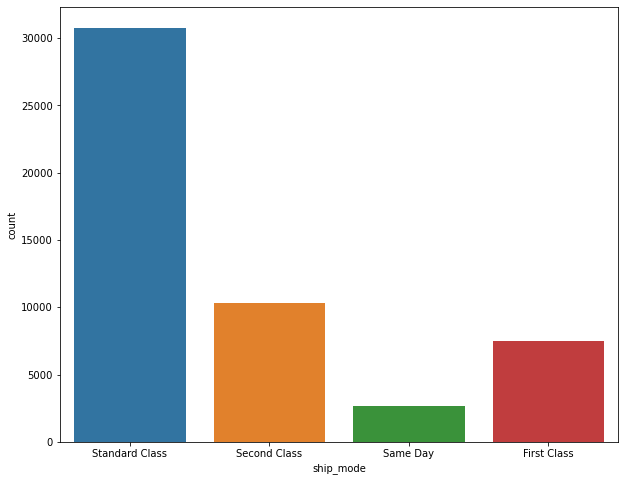

In [20]:
# Setting figure size
plt.figure(figsize = (10,8))

# Plotting ship mode
sns.countplot(df['ship_mode'])
plt.show()

- #### WHICH ARE THE MOST PROFITABLE CATEGORY AND SUB-CATEGORY?

In [22]:
# Grouping products by Category and Sub-category
cat_subcat = pd.DataFrame(df.groupby(['category', 'sub_category']).sum()['profit'])

# Sorting the values
cat_subcat.sort_values(['category', 'profit'])



,sales
product_name,
"Apple Smart Phone, Full Size",86935.7786
"Cisco Smart Phone, Full Size",76441.5306
"Motorola Smart Phone, Full Size",73156.3030
"Nokia Smart Phone, Full Size",71904.5555
Canon imageCLASS 2200 Advanced Copier,61599.8240
...,...
Avery Hi-Liter Pen Style Six-Color Fluorescent Set,7.7000
Grip Seal Envelopes,7.0720
Xerox 20,6.4800
